# Q-Q Plot

A quantile-quantile plot represents the similarity between distributions. Typically, we use Q-Q plots to determine whether a sample is approximately normally distributed by plotting actual quantiles against theoretical quantiles derived from the normal distribution.

In [11]:
import numpy as np
import pandas as pd
from scipy.special import ndtri
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

np.random.seed = 42

In [12]:
samples = np.random.randn(10)
sample_df = pd.DataFrame(samples, columns=["Observations"]).sort_values(by="Observations", ascending=True)

In [13]:
sample_df.head()

,Observations
5,-1.212757
2,-1.127725
3,-1.083717
0,-0.032652
7,0.183661


In [14]:
count = range(1, len(sample_df)+1)
sample_df["Count"] = count
sample_df.head()

,Observations,Count
5,-1.212757,1
2,-1.127725,2
3,-1.083717,3
0,-0.032652,4
7,0.183661,5


In [15]:
sample_df.describe()

,Observations,Count
count,10.000000,10.00000
mean,0.360055,5.50000
std,1.201289,3.02765
min,-1.212757,1.00000
25%,-0.820951,3.25000
50%,0.383407,5.50000
75%,1.519770,7.75000
max,1.722475,10.00000


In [16]:
quantiles = (len(sample_df) - sample_df["Count"])/(len(sample_df) - 1)
sample_df["Quantile"] = quantiles

In [17]:
sample_df.head(10)

,Observations,Count,Quantile
5,-1.212757,1,1.000000
2,-1.127725,2,0.888889
3,-1.083717,3,0.777778
0,-0.032652,4,0.666667
7,0.183661,5,0.555556
1,0.583152,6,0.444444
8,1.312030,7,0.333333
6,1.589016,8,0.222222
4,1.667062,9,0.111111
9,1.722475,10,0.000000


In [18]:
sample_df["Percentile Area"] = sample_df["Count"] / sample_df.shape[0]
sample_df.head()

,Observations,Count,Quantile,Percentile Area
5,-1.212757,1,1.000000,0.1
2,-1.127725,2,0.888889,0.2
3,-1.083717,3,0.777778,0.3
0,-0.032652,4,0.666667,0.4
7,0.183661,5,0.555556,0.5


In [19]:
sample_df["Z - Theoretical"] = ndtri(sample_df["Percentile Area"])
sample_df.head()

,Observations,Count,Quantile,Percentile Area,Z - Theoretical
5,-1.212757,1,1.000000,0.1,-1.281552
2,-1.127725,2,0.888889,0.2,-0.841621
3,-1.083717,3,0.777778,0.3,-0.524401
0,-0.032652,4,0.666667,0.4,-0.253347
7,0.183661,5,0.555556,0.5,0.000000


In [20]:
sample_df["Z - Actual"] = (sample_df["Observations"] - sample_df["Observations"].mean())/sample_df["Observations"].std(ddof=0)
sample_df.head()

,Observations,Count,Quantile,Percentile Area,Z - Theoretical,Z - Actual
5,-1.212757,1,1.000000,0.1,-1.281552,-1.380091
2,-1.127725,2,0.888889,0.2,-0.841621,-1.305478
3,-1.083717,3,0.777778,0.3,-0.524401,-1.266863
0,-0.032652,4,0.666667,0.4,-0.253347,-0.344587
7,0.183661,5,0.555556,0.5,0.000000,-0.154780


### Manual Q-Q Plots

The actual z values are plotted against the theoreticl z values from whichever distribution we are comparing against. Note that the values can be plotted on either axis.

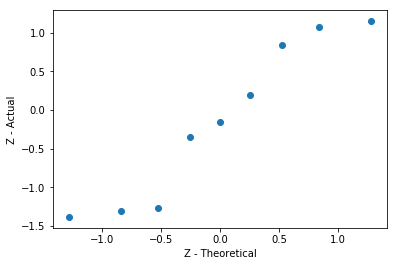

In [26]:
plt.scatter(sample_df["Z - Theoretical"], sample_df["Z - Actual"])
plt.xlabel("Z - Theoretical")
plt.ylabel("Z - Actual")
plt.show()

The points in the Q-Q plot fall approximately on the 45 degree line, indicating that the data is approximately normal (as it should be, since we are sampling from the standard normal distribution). However, with small samples there tends to be more variation.

### Built-in Q-Q Plots with sm.qqplot()

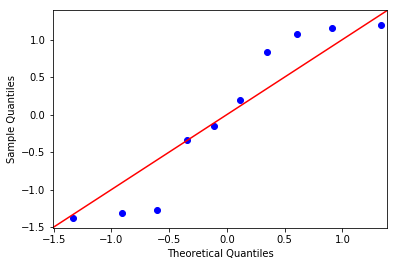

In [22]:
fig = sm.qqplot(sample_df["Observations"], stats.t, fit=True, line='45') # fit=True to automatically find the correct parameters for the t-distribution
plt.show()

#### Directly Calculating Percentiles

In [23]:
np.percentile(sample_df["Observations"], 50) # Notice that this is equal to the 50% row in the .describe() pandas method

0.3834065630015392

In [24]:
np.percentile(sample_df["Observations"], 100) # Equal to the max

1.722474556232375

In [25]:
sample_df["Observations"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00   -1.212757
0.25   -0.820951
0.50    0.383407
0.75    1.519770
1.00    1.722475
Name: Observations, dtype: float64